## Akian College of Science and Engineering, American University of Armenia

### FALL2023 | DS223: Marketing Analytics | Karen Hovhannisyan

#### **Assignment: Group Project**

**Authors:** Anahit Baghdasaryan, Lilit Galstyan, Natela Azoyan, Narek Khachikyan, Ofelya Stepanyan





### **Problem Definition:** Customer Lifetime Value (CLV) Analysis Challenges in Retail

* Accurate CLV determination is crucial for sustained business success

* CLV quantifies anticipated monetary value from a customer over their association with the company

* Retail store using product scanning technology faces the challenge of reliable CLV computation and deriving actionable insights for strategic decisions.


### **Problem Solution:** Python-Based CLV Analysis Package

*We present a solution to address the challenges posed by the Customer Lifetime Value (CLV) Analysis in Retail.*



### **Solution Highlights**

**Python Package Design:**

* We have developed a Python package equipped with built-in functions specifically designed for comprehensive CLV analysis and prediction.

**Complete CLV Analysis:**

* Our package facilitates end-to-end CLV analysis, covering all essential attributes and metrics.

* It ensures accurate determination of CLV, a key factor for sustained business success.

**Actionable Insights:**

* Built-in functions generate actionable insights, empowering strategic decision-makers with the information needed to drive business strategies effectively.


### **Benefits and Implications:**

* **Efficiency and Accuracy:** The Python package ensures efficiency and accuracy in CLV computation, enabling businesses to make informed decisions.

* **Strategic Decision Support:** Decision-makers gain valuable insights into customer behavior and preferences, aiding in the formulation of strategic decisions for sustained profitability.

* **User-Friendly Implementation:** The package is designed for user-friendly implementation, allowing businesses to leverage its capabilities without extensive technical expertise

# Package Usage Example


## 1. Building Schema for the Database

**Schema Builder Script**

This script builds the database schema using the classes defined in the CLV_Analysis.DB.schema module.
It imports all classes from the schema module to create the necessary tables for the SQLite database.

*Note:* The schema_builder.py file should be executed to set up the database schema.

In [ ]:
from CLV_Analysis.DB.schema import *

## 2. Generating Synthetic Data


**This script generates sample data for Customer Lifetime Value (CLV) analysis**


**Loading Modules and Packages**
- Import modules and packages necessary for data generation.

In [ ]:
from CLV_Analysis.DB.data_generator import generate_product
from CLV_Analysis.DB.data_generator import generate_customer
from CLV_Analysis.DB.data_generator import generate_transaction
from CLV_Analysis.DB.data_generator import generate_date
from CLV_Analysis.DB.data_generator import generate_sales
import pandas as pd
import random
import os


**Declaring Constants**
- Define constants for the number of products, customers, and transactions.


In [ ]:
NUMBER_OF_PRODUCTS=5000
NUMBER_OF_CUSTOMERS=3000
NUMBER_OF_TRANSACTIONS=4000

**Creating "data_csv" Folder, If It Doesn't Already Exist**

In [ ]:
# Check if 'data_csv' folder exists, if not, create it
output_directory = 'data_csv'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)


**Generating Customer Data**
- Generate customer data using the `generate_customer` function and save it to a CSV file.

In [ ]:
customer_data = [generate_customer(customer_id) for customer_id
                 in range(NUMBER_OF_CUSTOMERS)]

# Save customer data to CSV file in the 'data_csv' folder
output_file_path = os.path.join(output_directory, 'customer.csv')
pd.DataFrame(customer_data).to_csv(output_file_path, index=False)


**Generating Product Data**
- Generate product data using the `generate_product` function and save it to a CSV file.


In [ ]:
product_data = [generate_product(product_id) for product_id
                in range(NUMBER_OF_PRODUCTS)]
# Save product data to CSV file in the 'data_csv' folder
output_file_path = os.path.join(output_directory, 'product.csv')
pd.DataFrame(product_data).to_csv(output_file_path, index=False)


**Generating Transaction Data**
- Generate transaction data using the `generate_transaction` function and save it to a CSV file.

In [ ]:
transaction_data = [generate_transaction(transaction_id)
                    for transaction_id
                    in range(NUMBER_OF_TRANSACTIONS)] 
# Save transaction data to CSV file in the 'data_csv' folder
output_file_path = os.path.join(output_directory, 'transactions.csv')
pd.DataFrame(transaction_data).to_csv(output_file_path, index=False)


**Generating Dates Data**
- Generate date data using the `generate_date` function and save it to a CSV file.


In [ ]:
from datetime import datetime

# Define the start and end dates as strings
start_date = "2000-01-01"
end_date = "2023-12-31"

# Convert the date strings to datetime objects
start_date_obj = datetime.strptime(start_date, "%Y-%m-%d")
end_date_obj = datetime.strptime(end_date, "%Y-%m-%d")

# Calculate the difference between the two dates
number_of_days = (end_date_obj - start_date_obj).days
number_of_days

In [ ]:
dates_data = [generate_date(date_id) for date_id
              in range(number_of_days+1)] 
# Save date data to CSV file in the 'data_csv' folder
output_file_path = os.path.join(output_directory, 'date.csv')
pd.DataFrame(dates_data).to_csv(output_file_path, index=False)


**Generating Sales Data**
- Generate sales data by associating transactions with products, customers, and dates.
- Save the sales data to a CSV file.

In [ ]:
DateData = pd.DataFrame(dates_data)
TransData = pd.DataFrame(transaction_data)

DateData["date"] = pd.to_datetime(DateData["date"])
TransData["date"] = pd.to_datetime(TransData["date"])

In [ ]:
# Create an array with numbers from 1 to 4000
original_array = list(range(0, NUMBER_OF_TRANSACTIONS))

# Create a new array with randomly duplicated elements
duplicated_array = []
for num in original_array:
    # Generate a random number between 1 and 5 (inclusive)
    duplicates = random.randint(1, 5)
    # Append the number to the new array 'duplicates' times
    duplicated_array.extend([num] * duplicates)

len(duplicated_array)

In [ ]:
# Save sales data to CSV file in the 'data_csv' folder
output_file_path = os.path.join(output_directory, 'sales.csv')

sales_data = [generate_sales() for i in range(len(duplicated_array))] 
sales_data = pd.DataFrame(sales_data)
sales_data["transaction_id"] = duplicated_array
sales_data = sales_data[['transaction_id', 'product_id', 'quantity']]
sales_data = sales_data.merge(TransData,
                              on='transaction_id', how='left')
sales_data = sales_data.merge(DateData, on='date', how='left')
sales_data = sales_data[['transaction_id','product_id',
                         'customer_id', 'quantity', 'date_id']]
sales_data.to_csv(output_file_path, index=False)

## 3. Inserting the Generated Data Into the Schema

**Data Loading Script**

This script loads data into an SQLite database from CSV files using the `SqlHandler` class from the CLV_Analysis.DB.sql_interactions module. It populates tables for customers, transactions, products, dates, and sales in the 'temp.db' database.

*Modules:*

- CLV_Analysis.DB.sql_interactions: Provides the `SqlHandler` class for SQLite database interactions.

- sqlalchemy: SQL toolkit and Object-Relational Mapping (ORM) library.

- CLV_Analysis.DB.schema: Defines the SQLAlchemy schema for the 'Sale' table.

- pandas: Data manipulation and analysis library.

*Note:*

- Ensure that the necessary dependencies are installed, including pandas, sqlalchemy, and the CLV_Analysis package.

- The script assumes the presence of CSV files ('customer.csv', 'transactions.csv', 'product.csv', 'date.csv', 'sales.csv') in the 'data_csv' directory.



#### Loading Modules and Packages

In [ ]:

from CLV_Analysis.DB.sql_interactions import SqlHandler
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from CLV_Analysis.DB.schema import Sale
import pandas as pd


#### Insertion Into the Table of Customers

In [ ]:
# customer
Inst = SqlHandler('temp', 'customer')

data = pd.read_csv('data_csv/customer.csv')

# Inst.truncate_table()
Inst.insert_many(data)

Inst.close_cnxn()


#### Insertion Into the Table of Transactions

In [ ]:
# transaction
Inst1 = SqlHandler('temp', 'transactions')

data1 = pd.read_csv('data_csv/transactions.csv')

# Inst1.truncate_table()
Inst1.insert_many(data1)

Inst1.close_cnxn()


#### Insertion Into the Table of Products

In [ ]:
# property
Inst2 = SqlHandler('temp', 'product')

data2 = pd.read_csv('data_csv/product.csv')

# Inst2.truncate_table()
Inst2.insert_many(data2)

Inst2.close_cnxn()


#### Insertion Into the Table of Dates

In [ ]:
# date
Inst3 = SqlHandler('temp', 'date')

data3 = pd.read_csv('data_csv/date.csv')

# Inst3.truncate_table()
Inst3.insert_many(data3)

Inst3.close_cnxn()


#### Insertion Into the Fact Table of Sales

In [ ]:
# Sale
# Create a SQLAlchemy engine and session
engine = create_engine('sqlite:///temp.db')
Session = sessionmaker(bind=engine)
session = Session()

# Read CSV file into a list of dictionaries
data4 = pd.read_csv('data_csv/sales.csv').to_dict(orient='records')

# Insert the sample data into the 'sales_fact' table
for data in data4:
    sale = Sale(**data)
    session.add(sale)

# Commit the changes to the database
session.commit()

# Close the session
session.close()

## 4. Running Queries to Test the Functionality of the Database

*Note* : More queries can be found under queries.py and queries.ipynb files.

#### Loading Modules and Packages

In [2]:
from CLV_Analysis.DB.sql_interactions import SqlHandler
import pandas as pd

#### Creating an Intance of the SQLHandler() Class

In [3]:
Inst = SqlHandler('temp', ['sales_fact','transactions',
                           'customer','product', 'date'])

#### Writing Some Queries

In [4]:
# Retrieve customers who made transactions 
#in the month of January 2022.
query1 = """SELECT c.*
FROM customer c
JOIN transactions t
ON c.customer_id = t.customer_id
JOIN date d
ON t.date = d.date
WHERE d.year = 2022
AND d.month = 1;"""

# Retrieve male customers from Singapore.
query2 = """SELECT customer_id, customer_name, customer_surname
FROM customer
WHERE gender = 'Male'
AND country = 'Singapore';"""

# Retrieve products with prices greater than $50.
query3 = """SELECT *
FROM product
WHERE price > 50;"""

In [5]:
queries = [query1,
           query2,
           query3]

#### Executing Queries

In [ ]:
ls = []
for i in queries:
    ls.append(Inst.execute_custom_query(i))


#### Printing Results

In [7]:
count = 0

for i in ls:
    count+=1
    print(f'query {count}')
    print(pd.DataFrame(i))
    print("_______________")


query 1
      0         1         2                             3   \
0    502    Andrew        Li     stantonamanda@example.org   
1    303     Jerry    Lucero    butlerkimberly@example.net   
2   1735     David     Ramos           emily79@example.org   
3    438  Samantha     Tyler           cathy96@example.net   
4     76      Erin      Luna            yjones@example.com   
5    828      Lisa   Jenkins          teresa83@example.com   
6   1828     Diana    Moreno             xdean@example.org   
7   1669    Tamara     Smith            nwhite@example.net   
8   1283       Amy  Hatfield          knichols@example.net   
9    465      Ryan   Johnson         roselewis@example.com   
10   318   Annette   Russell  davischristopher@example.com   

                        4                      5                  6   \
0      (620)797-6307x26529           Turkmenistan          New Maria   
1   001-955-725-1142x66716                Somalia     Melissachester   
2         001-862-741-2937     

## 5. CLV and CLV Prediction with CLTVModel() Class

**Reference:** *https://www.kaggle.com/code/mehmeteryilmazz/clv-and-clv-prediction*

### Importing the Required Class and Making an Instance

In [38]:
from CLV_Analysis.Models.CLTV import CLTVModel

#### Instantiate the CLTVModel class

In [39]:
cltv_model = CLTVModel()

### 5.1. Connecting to DB
### 5.2. Deriving Data

In [40]:
# Load data from the SQLite database
cltv_model.load_data()

,sales_id,date,customer_id,transaction_id,product_category,SKU,quantity,unit_price
0,1,2021-06-05,1098,0,Clothing,4C555,4,44.96
1,2,2021-06-05,1098,0,Beauty,25F7D,10,90.25
2,3,2021-06-05,1098,0,Industrial,805A9,13,62.01
3,4,2021-06-05,1098,0,Automotive,E5CE6,12,1.26
4,5,2019-12-24,592,1,Electronics,6C804,11,48.97
...,...,...,...,...,...,...,...,...
12060,12061,2004-12-18,1945,3998,Garden,565D6,2,80.28
12061,12062,2004-12-18,1945,3998,Movies,EBB51,1,85.29
12062,12063,2004-12-18,1945,3998,Games,F3DF3,18,36.95
12063,12064,2014-07-13,1310,3999,Home,70967,12,9.78


### 5.3. Trying to understand the data.

In [41]:
# Check the loaded data
cltv_model.check_data()

################### Shape ####################
(12065, 8)
#################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12065 entries, 0 to 12064
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sales_id          12065 non-null  int64  
 1   date              12065 non-null  object 
 2   customer_id       12065 non-null  int64  
 3   transaction_id    12065 non-null  int64  
 4   product_category  12065 non-null  object 
 5   SKU               12065 non-null  object 
 6   quantity          12065 non-null  int64  
 7   unit_price        12065 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 754.2+ KB
None
################### Nunique ###################
sales_id            12065
date                 3206
customer_id          2186
transaction_id       4000
product_category       22
SKU                  4582
quantity               19
unit_price       

### **What is Customer Lifetime Value(CLV)?**

***The monetary value a customer will bring to a company during their relationship and communication is known as "customer lifetime value."***

This will be achieved by using the formulas below:

* **Repeat rate:** number of customers who make multiple purchases / all customers

* **Churn rate:** 1 - repeat rate

* **Purchase frequency:** total transactions / total number of unique customers

* **Average order value:** total price / total transactions

* **Customer value:** average order value * purchase frequency

* **Profit margin:** total price * profit margin rate(provided by the company)

* **CLV** = (customer value / churn rate) * profit margin

*Customers are segmented based on the generated CLV value, and operations are carried out according to these segments.*

#### **Dataset Details**

* **sale_id**: Unique Sale ID Number for each Respective Sale

* **date**: Date of Sales Transaction

* **customer_id**: Unique Customer iID for each Customer

* **transaction_id**: ID of the Transaction

* **product_category**: Product Category Name

* **SKU**: Product Code

* **quantity**: Number of Items Sold in the Transaction

* **unit_price** : Unit Price of the Respective Product

#### Calculate sales amount for each transaction

In [42]:
cltv_model.calculate_sales_amount().head()

,sales_id,date,customer_id,transaction_id,product_category,SKU,quantity,unit_price,sales_amount
0,1,2021-06-05,1098,0,Clothing,4C555,4,44.96,179.84
1,2,2021-06-05,1098,0,Beauty,25F7D,10,90.25,902.50
2,3,2021-06-05,1098,0,Industrial,805A9,13,62.01,806.13
3,4,2021-06-05,1098,0,Automotive,E5CE6,12,1.26,15.12
4,5,2019-12-24,592,1,Electronics,6C804,11,48.97,538.67


#### Calculate customer summary

In [43]:
cltv_model.calculate_customer_summary().head()

,total_transactions,total_sales_amount
customer_id,,
0,2,2709.35
1,1,3405.42
2,1,1679.49
3,2,3427.36
4,4,10040.15


#### Calculate average order value

In [44]:
cltv_model.calculate_average_order_value().head()

,total_transactions,total_sales_amount,average_order_value
customer_id,,,
0,2,2709.35,1354.6750
1,1,3405.42,3405.4200
2,1,1679.49,1679.4900
3,2,3427.36,1713.6800
4,4,10040.15,2510.0375


#### Calculate purchase frequency

In [45]:
cltv_model.calculate_purchase_frequency().head()

,total_transactions,total_sales_amount,average_order_value,purchase_frequency
customer_id,,,,
0,2,2709.35,1354.6750,0.000915
1,1,3405.42,3405.4200,0.000457
2,1,1679.49,1679.4900,0.000457
3,2,3427.36,1713.6800,0.000915
4,4,10040.15,2510.0375,0.001830


#### Calculate repeat rate

In [46]:
cltv_model.calculate_repeat_rate()

0.5315645013723697

#### Calculate churn rate

In [47]:
cltv_model.calculate_churn_rate()

0.46843549862763034

#### Calculate profit margin

In [48]:
cltv_model.calculate_profit_margin().head()

,total_transactions,total_sales_amount,average_order_value,purchase_frequency,profit_margin
customer_id,,,,,
0,2,2709.35,1354.6750,0.000915,270.935
1,1,3405.42,3405.4200,0.000457,340.542
2,1,1679.49,1679.4900,0.000457,167.949
3,2,3427.36,1713.6800,0.000915,342.736
4,4,10040.15,2510.0375,0.001830,1004.015


#### Calculate customer value

In [49]:
cltv_model.calculate_customer_value().head()

,total_transactions,total_sales_amount,average_order_value,purchase_frequency,profit_margin,customer_value
customer_id,,,,,,
0,2,2709.35,1354.6750,0.000915,270.935,1.239410
1,1,3405.42,3405.4200,0.000457,340.542,1.557832
2,1,1679.49,1679.4900,0.000457,167.949,0.768294
3,2,3427.36,1713.6800,0.000915,342.736,1.567868
4,4,10040.15,2510.0375,0.001830,1004.015,4.592932


#### Calculate CLTV

In [50]:
cltv_tb= cltv_model.calculate_cltv()
cltv_tb.head()

,total_transactions,total_sales_amount,average_order_value,purchase_frequency,profit_margin,customer_value,clv
customer_id,,,,,,,
0,2,2709.35,1354.6750,0.000915,270.935,1.239410,716.853264
1,1,3405.42,3405.4200,0.000457,340.542,1.557832,1132.508338
2,1,1679.49,1679.4900,0.000457,167.949,0.768294,275.457682
3,2,3427.36,1713.6800,0.000915,342.736,1.567868,1147.148103
4,4,10040.15,2510.0375,0.001830,1004.015,4.592932,9844.200393


#### Creating the Segments
#### Dividing the CLTV values into 4 parts and creating a segment variable.

In [51]:
cltv_model.create_segments(customer_summary_pr=cltv_tb).head()

,total_transactions,total_sales_amount,average_order_value,purchase_frequency,profit_margin,customer_value,clv,segment
customer_id,,,,,,,,
36,5,13330.71,2666.142000,0.002287,1333.071,6.098220,17354.280186,A
1366,7,13066.54,1866.648571,0.003202,1306.654,5.977374,16673.287849,A
1963,5,13005.09,2601.018000,0.002287,1300.509,5.949263,16516.832608,A
1184,5,12743.08,2548.616000,0.002287,1274.308,5.829405,15858.016395,A
1247,5,12728.07,2545.614000,0.002287,1272.807,5.822539,15820.680266,A


#### Display the summary of segments

In [52]:
cltv_model.display_segments_summary(customer_summary_pr=cltv_tb)

total_transactions                 total_sales_amount        \
                       sum count      mean                sum count   
segment                                                               
D                      624   547  1.140768          372034.01   547   
C                      765   546  1.401099          978890.74   546   
B                     1047   546  1.917582         1702866.32   546   
A                     1564   547  2.859232         3089417.68   547   

                     average_order_value                     \
                mean                 sum count         mean   
segment                                                       
D         680.135302        3.410161e+05   547   623.429741   
C        1792.840183        7.943456e+05   546  1454.845449   
B        3118.802784        1.038962e+06   546  1902.861523   
A        5647.929945        1.169123e+06   547  2137.336455   

        purchase_frequency  ...           profit_margin                    \
                       sum  ...      mean           sum count        mean   
segment                     ...                                             
D                 0.285453  ...  0.000522     37203.401   547   68.013530   
C                 0.349954  ...  0.000641     97889.074   546  179.284018   
B                 0.478957  ...  0.000877    170286.632   546  311.880278   
A                 0.715462  ...  0.001308    308941.768   547  564.792995   

        customer_value                           clv                     
                   sum count      mean           sum count         mean  
segment                                                                  
D           170.189392   547  0.311132  3.142849e+04   547    57.456097  
C           447.799973   546  0.820146  1.767417e+05   546   323.702829  
B           778.987338   546  1.426717  5.293691e+05   546   969.540470  
A          1413.274328   547  2.583683  1.851696e+06   547  3385.184838  

[4 rows x 21 columns]

### **CLV Prediction with BG-NBD and Gamma-Gamma**

***CLTV Prediction: BG/NBD Gamma gamma submodel***

Hereby, performing CLTV prediction with BG/NBD and Gamma-Gamma.

#### Expected Number of Transactions with BG/NBD.

BG/NBD is used as a standalone sales prediction model, that is; it predicts the expected number of purchases per customer.

**The information we need to use in this model and learn from the customer is:**

* **frequency:** Number of repeated purchases by the customer (more than 1) (frequency)

* **recency:** Time between a customer's first and last purchase

* **T:** Time since the customer's first purchase (customer's age)

#### Calculate CLTV prediction data

In [53]:
cltv_model.calculate_cltv_pr().head()

,recency,T,frequency,monetary
customer_id,,,,
0,3340,3796,2,1354.6750
1,0,8654,1,3405.4200
2,0,8594,1,1679.4900
3,1689,5891,2,1713.6800
4,3941,6511,4,2510.0375


#### Fit the BG-NBD model

In [54]:
cltv_model.fit_bgf_model()

#### Plot frequency-recency matrix

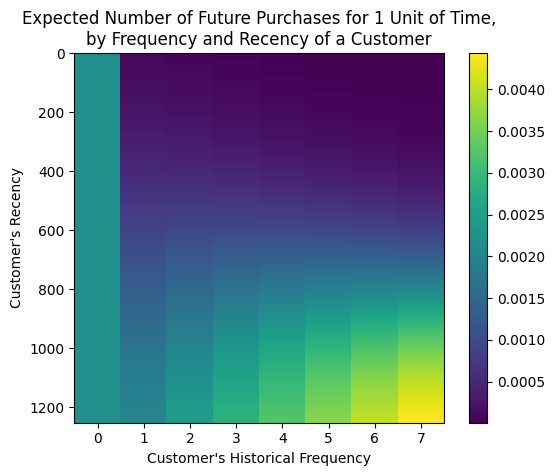

In [55]:
cltv_model.plot_frequency_recency_matrix()

Here we can see that our best customers who bought from us at least 2 times and their lastest purchase was when they were around 550 weeks old. The oldest customers which are mainly in the top right corner bought quickly and "disappeard". 

#### Plot probability alive matrix

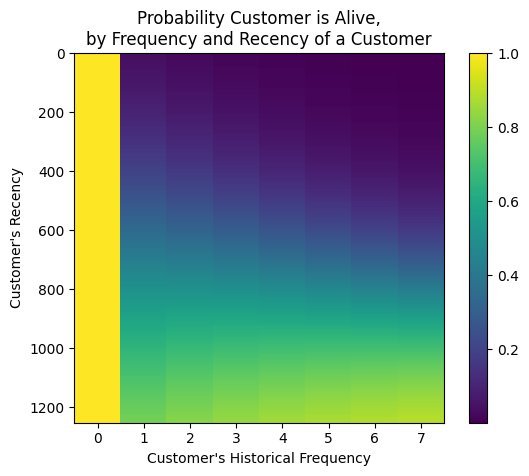

In [56]:
cltv_model.plot_probability_alive_matrix()

So we can see that the customers who have "disappeared" have less probability to be alive.

#### Ranking customers from best to worst


Let's return to our customers and rank them from "highest expected purchases in the next period" to lowest. Models expose a method that will predict a customer's expected purchases in the next period using their history.

#### Predict purchases

In [57]:
cltv_model.predict_purchases().tail()

,recency,T,frequency,monetary,predicted_purchases
customer_id,,,,,
891,241.285714,281.571429,3,2034.890000,0.004426
1646,611.285714,660.714286,5,2138.866000,0.004562
1366,678.857143,830.000000,7,1866.648571,0.004574
2591,440.142857,457.000000,4,1982.552500,0.004651
66,125.142857,154.714286,3,1537.083333,0.004846


#### Plot period transactions

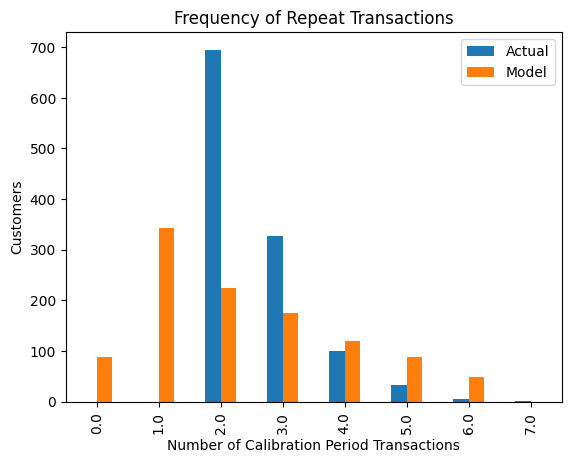

In [58]:
cltv_model.plot_period_transactions()

## Estimating Customers' Lifetime Value

We can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.

#### Fit the Gamma-Gamma model

In [59]:
cltv_model.fit_ggf_model()

#### Calculate expected average profit

In [60]:
cltv_model.calculate_expected_average_profit().head()

,recency,T,frequency,monetary,predicted_purchases,expected_average_profit
customer_id,,,,,,
1278,457.142857,598.714286,2,3928.580,0.002893,4461.315176
2749,257.714286,375.000000,2,3848.400,0.003309,4370.299541
2666,103.857143,850.285714,2,3629.345,0.000535,4121.641148
2108,375.000000,911.571429,2,3588.965,0.001227,4075.804140
2650,47.428571,477.714286,2,3572.110,0.001535,4056.671332


#### Calculate CLTV prediction for 3 months

In [61]:
cltv_model.calculate_cltv_prediction(time_period =3, discount_rate=0.01/4).head()

,customer_id,clv
0,0,64.188974
1,3,24.387114
2,4,78.009128
3,6,34.329718
4,8,28.160002


#### Calculate CLTV prediction for 12 months

In [62]:
cltv_model.calculate_cltv_prediction().head()

,customer_id,clv
0,0,238.722615
1,3,90.866954
2,4,290.853756
3,6,128.141673
4,8,104.839967


#### Merge CLTV predictions with other variables

In [63]:
cltv_model.merge_cltv_predictions().head()

,customer_id,recency,T,frequency,monetary,predicted_purchases,expected_average_profit,clv
0,0,477.142857,542.285714,2,1354.6750,0.003229,1539.569127,238.722615
1,3,241.285714,841.571429,2,1713.6800,0.000969,1947.090555,90.866954
2,4,563.000000,930.142857,4,2510.0375,0.002261,2669.760600,290.853756
3,6,639.285714,1230.428571,2,2058.6150,0.001135,2338.640543,128.141673
4,8,395.571429,701.285714,2,888.0300,0.002159,1009.861082,104.839967


#### Create segments based on CLTV

In [64]:
cltv_model.create_segments().head()

,customer_id,recency,T,frequency,monetary,predicted_purchases,expected_average_profit,clv,segment
1060,2749,257.714286,375.000000,2,3848.400,0.003309,4370.299541,693.354346,A
153,338,276.428571,292.714286,2,2961.825,0.003881,3363.911581,625.303408,A
654,1631,364.285714,385.285714,2,3112.985,0.003659,3535.499550,620.250362,A
516,1278,457.142857,598.714286,2,3928.580,0.002893,4461.315176,620.238336,A
967,2518,261.285714,283.142857,2,2825.805,0.003884,3209.509651,596.892855,A


#### Display segments summary

In [65]:
cltv_model.display_segments_summary()

customer_id                           recency                    \
                sum count         mean            sum count        mean   
segment                                                                   
D            413821   291  1422.065292   86240.285714   291  296.358370   
C            423530   290  1460.448276  149100.000000   290  514.137931   
B            431699   290  1488.617241  177011.000000   290  610.382759   
A            444825   291  1528.608247  186137.857143   291  639.648994   

                     T                   frequency  ...     monetary  \
                   sum count        mean       sum  ...         mean   
segment                                             ...                
D        287330.857143   291  987.391262       675  ...  1184.658701   
C        265252.571429   290  914.664039       717  ...  1327.827156   
B        250523.571429   290  863.874384       764  ...  1581.433430   
A        225457.285714   291  774.767305       820  ...  2083.573965   

        predicted_purchases                 expected_average_profit        \
                        sum count      mean                     sum count   
segment                                                                     
D                  0.267431   291  0.000919           387088.650619   291   
C                  0.525829   290  0.001813           430472.776050   290   
B                  0.708097   290  0.002442           510004.440147   290   
A                  0.892963   291  0.003069           670512.421254   291   

                               clv                    
                mean           sum count        mean  
segment                                               
D        1330.201549  12409.342672   291   42.643789  
C        1484.388883  32489.938652   290  112.034271  
B        1758.636001  55766.196446   290  192.297229  
A        2304.166396  96202.076554   291  330.591328  

[4 rows x 24 columns]

## 6. FastAPI for Our SQLite Database


**Run Script**

This script starts the FastAPI application using uvicorn and opens the documentation (swagger) in a web browser.

*Note:* Ensure that the uvicorn package is installed before running this script.


#### Loading Modules and Packages


In [66]:
import subprocess
import webbrowser
from CLV_Analysis.API import main


#### Function to Open Swagger

In [ ]:
def start_fastapi():
    subprocess.run(["uvicorn", "CLV_Analysis.API.main:app",
                    "--reload"])
    webbrowser.open('http://127.0.0.1:8000/docs#/')


name = "__main__"

if name == "__main__":
    start_fastapi()